In [324]:
# Tratamiento de datos
# --------------------------------
import pandas as pd
import numpy as np

# Visualización
# --------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# --------------------------------
import scipy.stats as stats
from scipy.stats import shapiro,  poisson, chisquare, expon, kstest
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# --------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

### Fase 1: Exploración y Limpieza
#### 1 - Exploración Inicial

Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

Empiezo con el fichero Customer_Flight_Activity.csv

In [325]:
df_flights = pd.read_csv("Customer_Flight_Activity.csv") 
pd.set_option("display.max_columns", None) #Por si acaso el fichero es muy grande, añado la opción de display max

In [326]:
df_flights.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [327]:
#Primero vamos a verificar cuantas columnas y filas tenemos
print(f"Tenemos en el fichero Customer Flight Activity {df_flights.shape[1]} columnas y {df_flights.shape[0]} filas.")

Tenemos en el fichero Customer Flight Activity 10 columnas y 405624 filas.


In [328]:
df_flights.columns.to_list() #para obtener el nombre de todas las columnas, le pongo .to_list para que sea mas visual.

['Loyalty Number',
 'Year',
 'Month',
 'Flights Booked',
 'Flights with Companions',
 'Total Flights',
 'Distance',
 'Points Accumulated',
 'Points Redeemed',
 'Dollar Cost Points Redeemed']

In [329]:
df_flights.info() #Un info para obtener un resumen de mi df de flights
#Veo con el info que no tengo ningun null dentro de este fichero, y tengo datos int64 y float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [330]:
#por si acaso, verifico sumando todos los nulls de mi fichero csv, columna por columna
df_flights.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [331]:
#Concisa de mi df
df_flights.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [332]:
#Miramos las filas duplicadas
df_flights.duplicated().sum()

1864

In [333]:
#Voy a buscar los valores unicos de cada columna para seguir con la investigación
for column in df_flights.columns:
  
    print(f"Columna: {column}")
    print(df_flights[column].unique())

    print("\n--------------------\n")

Columna: Loyalty Number
[100018 100102 100140 ... 999731 999788 999891]

--------------------

Columna: Year
[2017 2018]

--------------------

Columna: Month
[ 1  9  2  3 11  4  5  7  6  8 10 12]

--------------------

Columna: Flights Booked
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]

--------------------

Columna: Flights with Companions
[ 0  4  7  1  6  3  5  2 10  8  9 11]

--------------------

Columna: Total Flights
[ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]

--------------------

Columna: Distance
[1521 2030 1200 ... 1217  617 4135]

--------------------

Columna: Points Accumulated
[152.   203.   120.   ...  18.75 601.   626.  ]

--------------------

Columna: Points Redeemed
[  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 352 482 335 329 305 415 396
 31

#### Exploración inicial del segundo fichero csv, "Customer_Loyalty_History.csv"

In [334]:
#Ahora puedo empezar con la exploración inicial de mi segundo fichero csv

df_loyalty = pd.read_csv("Customer_Loyalty_History.csv") 
pd.set_option("display.max_columns", None) #Por si acaso el fichero es muy grande, añado la opción de display max

In [335]:
df_loyalty.sample(5) #primera toma de contacto para ver el fichero

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
10852,641704,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,50609.0,Married,Star,2515.26,Standard,2013,9,NaN,NaN
13012,361892,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,83189.0,Married,Star,4743.62,Standard,2014,3,NaN,NaN
2483,549415,Canada,Quebec,Quebec City,G1B 3L5,Female,College,NaN,Single,Aurora,8216.39,Standard,2013,3,NaN,NaN
15137,769030,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,70853.0,Divorced,Star,8535.11,Standard,2012,10,NaN,NaN
16395,139023,Canada,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,55271.0,Married,Nova,9788.71,2018 Promotion,2018,3,NaN,NaN


In [336]:
#Primero vamos a verificar cuantas columnas y filas tenemos
print(f"Tenemos en el fichero Customer Flight Activity {df_loyalty.shape[1]} columnas y {df_flights.shape[0]} filas")

Tenemos en el fichero Customer Flight Activity 16 columnas y 405624 filas


In [337]:
#Miramos los duplicados
df_loyalty.duplicated().sum()

0

In [338]:
df_loyalty.columns.to_list() #para obtener el nombre de todas las columnas en una lista

['Loyalty Number',
 'Country',
 'Province',
 'City',
 'Postal Code',
 'Gender',
 'Education',
 'Salary',
 'Marital Status',
 'Loyalty Card',
 'CLV',
 'Enrollment Type',
 'Enrollment Year',
 'Enrollment Month',
 'Cancellation Year',
 'Cancellation Month']

In [339]:
df_loyalty.info() #Un info para obtener un resumen de mi df de flights

#Veo que tengo 3 columnas con nulos, hay columnas en INT64 y otras en float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [340]:
#verifico cuantos nulos tengo por cada columna
df_loyalty.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [341]:
#Concisa de mi df
df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [342]:
#Voy a mirar los valores unicos de cada columna para seguir con la investigación
for column in df_loyalty.columns:
  
    print(f"Columna: {column}")
    print(df_loyalty[column].unique())

    print("\n--------------------\n")

Columna: Loyalty Number
[480934 549612 429460 ... 776187 906428 652627]

--------------------

Columna: Country
['Canada']

--------------------

Columna: Province
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

--------------------

Columna: City
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']

--------------------

Columna: Postal Code
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9'

A primera vista, los datos que limpiar seran : 

- Salary = Valores negativos y nulos
- Cancellation Year = nulos
- Cancellation Month = nulos

#### Uno mis dos dataframes en un unico df llamado df_customer

In [343]:
#He podido ver, gracias a mi exploración incial, que mis dos df tienen una columna que se llama "Loyalty Number", por lo cual voy a unirlos con un merge y un on.
df_customer = df_loyalty.merge(df_flights, on = "Loyalty Number")
df_customer.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


In [344]:
#Los datos iniciales de mi nuevo df son :
print(f"Tenemos {df_customer.shape[1]} columnas y {df_customer.shape[0]} filas")

Tenemos 25 columnas y 405624 filas


In [345]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollment Year              405624 non-null  int64  
 13 

#### 2 - Limpieza de Datos

Reminder de lo primero a limpiar : 

- Salary = Valores negativos y nulos
- Cancellation Year = nulos
- Cancellation Month = nulos
- Crear función de float a int
-

In [346]:
#Vamos ahora a quitar los duplicados
df_customer.duplicated().sum() #recuerdo cuantos duplicados tengo que borrar

1864

In [347]:
df_customer.drop_duplicates(inplace=True) #borro los duplicados
df_customer.duplicated().sum() #y verifico si ha funcionado

0

In [348]:
#Vamos a limpiar las columnas, pasando los nombres a minusculas, reemplazando los espacios y los nulos.

def limpiar_datos(df):
    """
    Convierte el nombre de las columnas a minusculas y reemplaza los espacios por guión bajo "_"

    Coge como parametro el dataframe a modificar y lo devuelve modificado
    """

    df.columns = [columna.lower() for columna in df.columns] #Primero pasamos todo a minusculas

    df.columns = [columna.replace(" ", "_") for columna in df.columns] #reemplazo los espacios por "_" para hacerlo mas legible

    for columna in df.select_dtypes(include="number").columns: #Convierto a nulos los posibles valores negativos de las columnas numericas (tipo salary)
        df[columna] = df[columna].apply(lambda x: np.nan if x < 0 else x) #Uso el metodo lambda para reemplazar valores negativos por valores nan antes de limpiar todos los nan de mi fichero.

    return df

In [349]:
df_customer = limpiar_datos(df_customer) #Llamo a la funcion limpiar_datos para el df unido.
df_customer.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


In [350]:
#Ahora vamos a tratar los nulos

nulos = df_customer.columns[df_customer.isnull().any()] #Primero verifico las columnas donde tengo nulos
nulos.to_list() #son solamente columnas numericas

['salary', 'cancellation_year', 'cancellation_month']

In [351]:
df_customer[['salary', 'cancellation_year', 'cancellation_month']].sample(5)

,salary,cancellation_year,cancellation_month
3233,90077.0,NaN,NaN
99913,98006.0,NaN,NaN
1768,76410.0,NaN,NaN
182348,54846.0,NaN,NaN
369066,87676.0,NaN,NaN


In [352]:
#Voy a calcular el porcentaje de nulos que tengo para las columnas cancellation year y month
nulos_porcentaje_year = (df_customer['cancellation_year'].isnull().sum()/df_customer.shape[0])*100
nulos_porcentaje_year

87.70309094511592

In [353]:
nulos_porcentaje_month = (df_customer['cancellation_month'].isnull().sum()/df_customer.shape[0])*100
nulos_porcentaje_month

87.70309094511592

In [354]:
#Tengo un % muy alto de nulos pero entiendo que, para las columnas de cancellation:year y cancellation_month, los NaN significan que no han cancelado, por lo cual son todavía activos. 
# Tomo la decisión de quedarme con las columnas y simplemente reemplazar los nulos por un cero.
cancelaciones = ['cancellation_year', 'cancellation_month']

for columna in cancelaciones:
    df_customer[columna] = df_customer[columna].fillna(0) #itero a través de mis columnas donde tengo que reemplazar los nan por ceros.
    df_customer[columna] = df_customer[columna].astype(int) #paso los datos a int ya no que son dos columnas de fecha por lo cual no deberian de ser float

print(f"Después del fillna' nos quedan {df_customer[columna].isnull().sum()} nulos")

Después del fillna' nos quedan 0 nulos


In [355]:
#Seguimos con la columna Salary. Primero, me di cuenta que los valores nulos son de nivel de education college. Me aseguro que college solamente tenga valores nulos.
edu_college = df_customer.loc[df_customer['education'] == 'college', 'salary']
edu_college

Series([], Name: salary, dtype: float64)

In [356]:
#Voy a calcular cual es el procentaje de nulos de la columna para saber si simplemente reemplazo los datos por unknown o si intento sacarlo la mediana.
porcentaje_nulos_salary = (df_customer['salary'].isnull().sum()/df_customer.shape[0])*100
print(f"El porcentaje de nulos de la columna Salary es de {porcentaje_nulos_salary}%.")

El porcentaje de nulos de la columna Salary es de 25.445809391717848%.


In [357]:
#El porcentaje de nulos es de 25%, por lo cual voy a calcular la mediana de los diferentes niveles de education menos college para sacar este dato.
#Tenemos actualmente salarios muy altos y muy bajos, por lo cual voy a elegir la mediana para encontrar el valor central ya que la diferencia entre los valores no influye tanto como seria con la media.
mediana_salary = df_customer[df_customer["education"] != "college"]["salary"].median()
print(f"La mediana de salario (excluyendo a college) es de {mediana_salary}.")

#Ahora toca reemplazar los nulos por mi mediana calculada.
df_customer["salary"].fillna(mediana_salary, inplace=True)

La mediana de salario (excluyendo a college) es de 73523.0.


In [358]:
#Verifico que se hayan quitado todos los nulos de mi dataframe.
df_customer.isnull().sum()

loyalty_number                 0
country                        0
province                       0
city                           0
postal_code                    0
gender                         0
education                      0
salary                         0
marital_status                 0
loyalty_card                   0
clv                            0
enrollment_type                0
enrollment_year                0
enrollment_month               0
cancellation_year              0
cancellation_month             0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
dtype: int64

In [359]:
df_customer.info() #veo que me quedan 3 columnas float. Voy a convertir dos de ellas a int pero no voy a convertir points_accumulated ya que tiene datos despues de la coma.

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   country                      403760 non-null  object 
 2   province                     403760 non-null  object 
 3   city                         403760 non-null  object 
 4   postal_code                  403760 non-null  object 
 5   gender                       403760 non-null  object 
 6   education                    403760 non-null  object 
 7   salary                       403760 non-null  float64
 8   marital_status               403760 non-null  object 
 9   loyalty_card                 403760 non-null  object 
 10  clv                          403760 non-null  float64
 11  enrollment_type              403760 non-null  object 
 12  enrollment_year              403760 non-null  int64  
 13  enro

In [360]:
def float_to_int(df,columnas):
    """
    Convertir datos de un dataframe de float64 a int64  .
    Coge como parametro el dataframe a modificar y lo devuelve modificado
    """

    for columna in columnas:
        if columna in df.columns and df[columna].dtype == "float64":
            df[columna] = df[columna].astype(int)
    
    return df

In [361]:
convertir_columnas = ["clv","salary"] #creo una lista con las columnas que cambiar

df_customer = float_to_int(df_customer,convertir_columnas) #llamo a mi función

df_customer.info() #verifico si ha funcionado

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   country                      403760 non-null  object 
 2   province                     403760 non-null  object 
 3   city                         403760 non-null  object 
 4   postal_code                  403760 non-null  object 
 5   gender                       403760 non-null  object 
 6   education                    403760 non-null  object 
 7   salary                       403760 non-null  int64  
 8   marital_status               403760 non-null  object 
 9   loyalty_card                 403760 non-null  object 
 10  clv                          403760 non-null  int64  
 11  enrollment_type              403760 non-null  object 
 12  enrollment_year              403760 non-null  int64  
 13  enro

In [362]:
#Visión final de mi dataframe
df_customer.sample(15)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
55729,456294,Canada,British Columbia,Victoria,V10 6T5,Female,College,73523,Married,Aurora,7804,Standard,2016,9,0,0,2017,3,13,3,16,2624,262.00,0,0
353841,315482,Canada,Ontario,Sudbury,M5V 1G5,Male,High School or Below,59423,Married,Star,7426,Standard,2014,5,0,0,2017,12,0,0,0,0,0.00,0,0
201922,351889,Canada,Ontario,Kingston,M9K 2P4,Male,Bachelor,73695,Married,Nova,8707,Standard,2014,8,0,0,2017,11,1,1,2,2646,264.00,0,0
339971,657946,Canada,Quebec,Montreal,H2T 2J6,Female,Bachelor,75827,Married,Nova,3939,2018 Promotion,2018,4,0,0,2017,12,0,0,0,0,0.00,0,0
170343,429894,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,79864,Married,Nova,5799,Standard,2016,3,0,0,2018,3,12,3,15,3150,393.75,0,0
163023,517729,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,65131,Married,Nova,5460,Standard,2017,3,0,0,2018,3,3,1,4,1188,147.50,398,32
313853,615673,Canada,British Columbia,Vancouver,V1E 4R6,Male,Master,123828,Married,Star,4636,Standard,2015,8,0,0,2017,6,10,2,12,1992,199.00,0,0
213712,415201,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,77574,Divorced,Nova,10662,Standard,2018,1,0,0,2018,6,1,0,1,1619,161.00,0,0
404942,851979,Canada,Ontario,Ottawa,K1F 2R2,Male,College,73523,Married,Star,39033,Standard,2012,11,0,0,2018,3,0,0,0,0,0.00,0,0
67833,416575,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,92396,Married,Aurora,8838,Standard,2015,12,0,0,2017,11,4,4,8,1416,141.00,0,0


### Fase 2: Visualización

#### 3. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

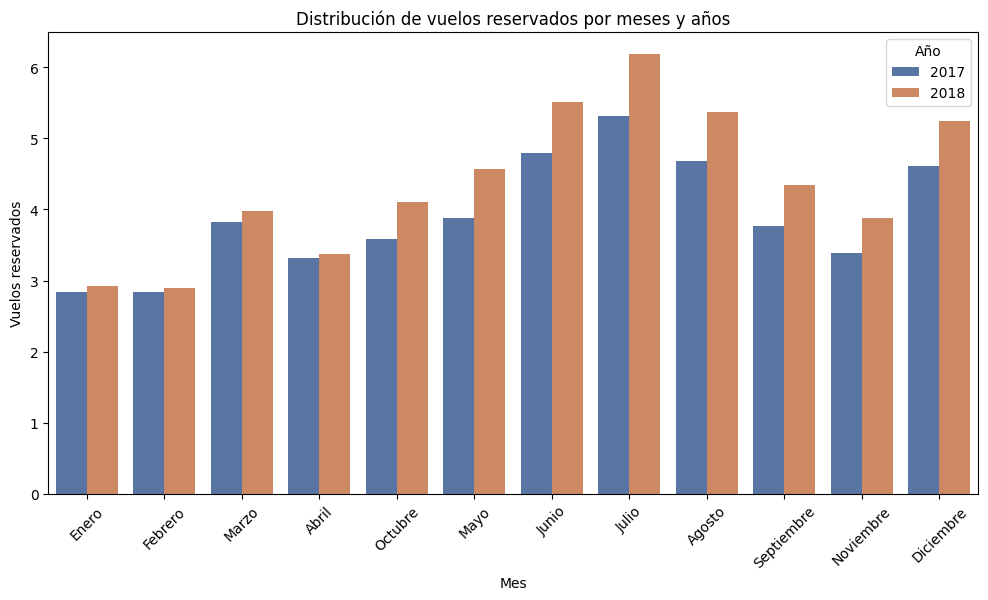

In [363]:
meses_reservas = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', #primero necesito un dicc para mapear los numeros de mi columna a meses con nombre para hacerlo mas visual.
                7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

df_customer['nombre_mes'] = df_customer['month'].map(meses_reservas) #añado columna con los nombres de los meses

#creación de mi grafica de barras 
plt.figure(figsize=(12, 6))
sns.barplot(data=df_customer, x='nombre_mes', y='flights_booked', hue='year', palette='deep', errorbar=None) #cambio el ci=None por errorbar=None porque recibi un futurewarning de que ci es "deprecated"

#Personalizo mi grafica
plt.xlabel('Mes')
plt.ylabel('Vuelos reservados')
plt.title('Distribución de vuelos reservados por meses y años')
plt.legend(title='Año')
plt.xticks(rotation=45)  # Giro las etiquetas porque sino no se lee bien los nombres
plt.show()


Segun nuestra grafica, podemos ver que hubo un aumento en la cantidad total de compras de vuelos en 2018 comparando con 2017.

Sin embargo, se repite el mismo patrón en los dos años donde los meses de mas reservas son los meses de verano (junio, julio, agosto) y el mes de diciembre por las fiestas de final de año.

#### 4. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

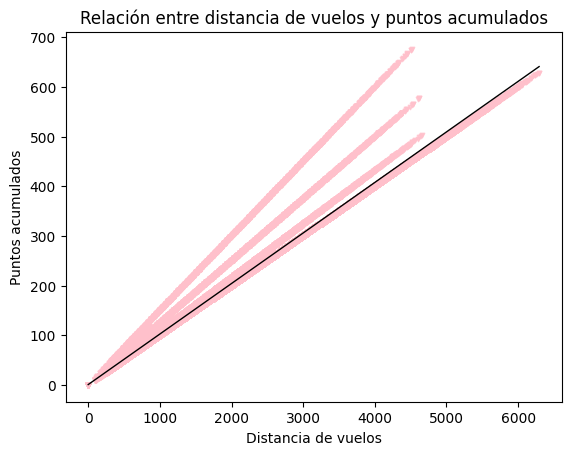

In [364]:
sns.regplot(x="distance", 
            y="points_accumulated", 
            data=df_customer,
            marker="v", 
            line_kws={"color": "black", "linewidth": 1},
            scatter_kws={"color": "pink", "s": 10})

# Personalizo mi grafica
plt.xlabel("Distancia de vuelos")
plt.ylabel("Puntos acumulados")
plt.title("Relación entre distancia de vuelos y puntos acumulados")
plt.show()

Podemos ver una relación positiva entre nuestras dos variables 'distancia' y 'puntos acumulados'. Esto nos indica que se obtiene un una mayor cantidad de puntos para los vuelos de más distancia.

#### 5. ¿Cuál es la distribución de los clientes por provincia o estado?

In [365]:
#Primero tengo que buscarlo los valores unicos de mi columna "loyalty_number" para tener la grafica la mas precisa posible.

df_unique_customers = df_customer.drop_duplicates(subset='loyalty_number') #Elimino los duplicados para obtener valores unicos

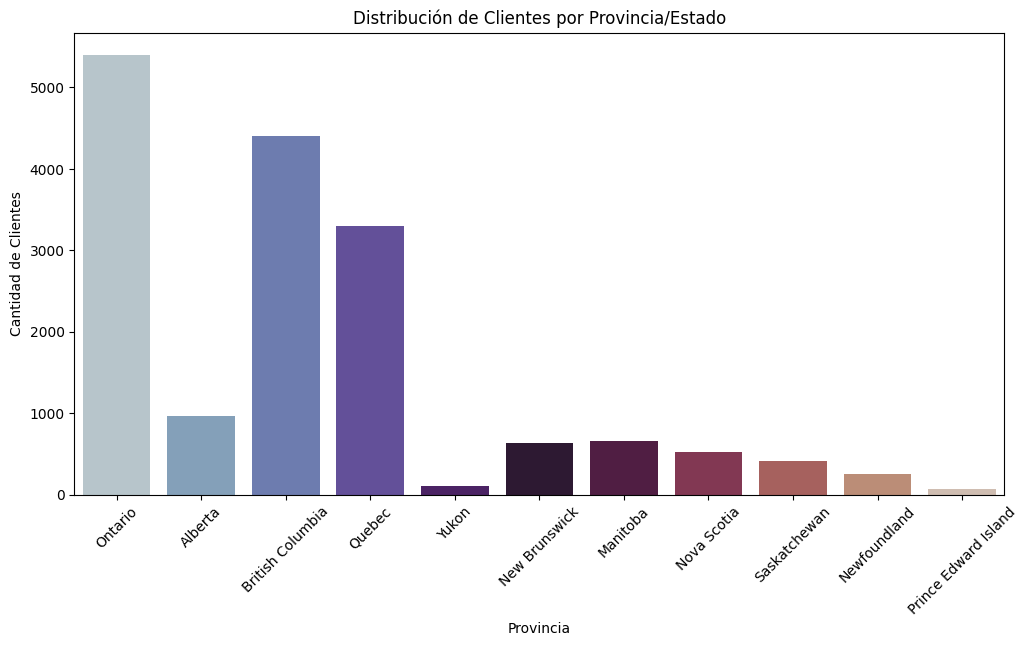

In [382]:
#Creación de mi grafica de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=df_unique_customers, x='province', palette='twilight')

plt.xlabel('Provincia')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Clientes por Provincia/Estado')

plt.xticks(rotation=45)  
plt.show()

Gracias a nuestra grafica, podemos constatar que la gran mayoría de los clientes se reparten entre Ontario, British Columbia y Quebec (en este orden). 
Aunque Quebec llegue en tercera posición, la cantidad de cliente que viven en Ontaria es casi su doble, por lo cual confirmamos que Ontario es la provincia donde viven la mayor cantidad de nuestros clientes.

#### 6. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

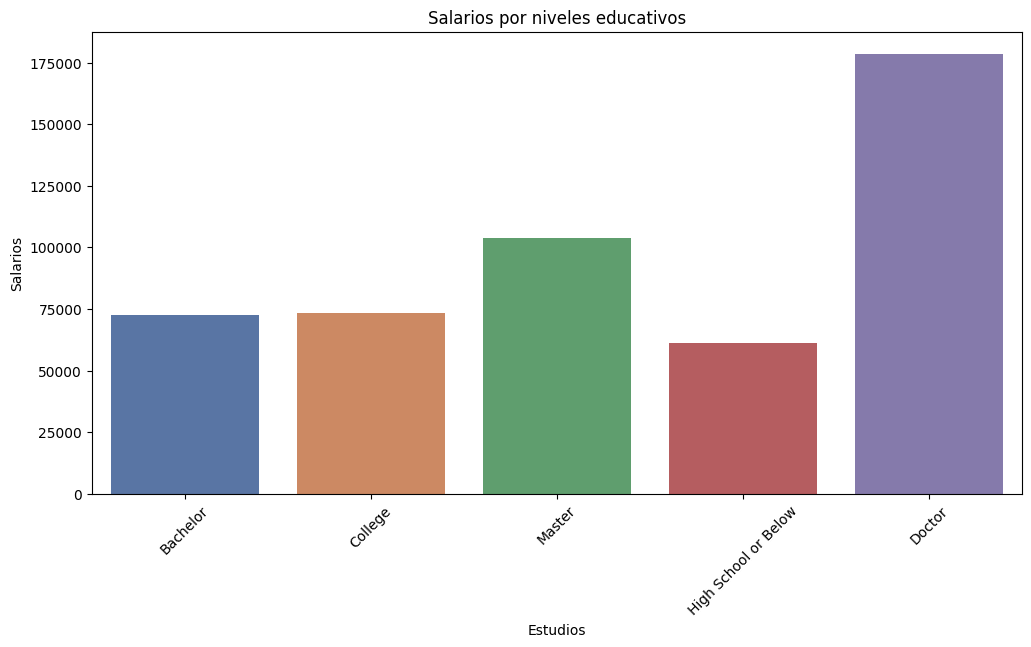

In [367]:
#creación de mi grafica de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_unique_customers,
             x="education",
             y="salary",
             palette='deep',
             errorbar=None) #cambio el ci=None por errorbar=None porque recibi un futurewarning de que ci es "deprecated"

#Personalizo mi grafica
plt.xlabel('Estudios')
plt.ylabel('Salarios')
plt.title('Salarios por niveles educativos')
plt.xticks(rotation=45)  # Giro las etiquetas porque sino no se lee bien los nombres
plt.show()

- Gracias a nuestra grafica de salarios dividios por niveles educativos, podemos ver que el doctorado es sin duda el nivel que te permito ganar tener el salario mas alto ya que es casi el doble del que llega en segunda posición, el master.
- Sin embargo, apenas hay diferencia entre el bachelor, college o high school.
- En conclusión, podemos concluir que, normalmente, mas alto son los estudios, mas probabilidad hay de tener un suelto alto, pero que la diferencia entre high school y college no es significativa.

#### 7. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [368]:
#Primero creo mi df con la información necesaria
df_fidelidad = df_unique_customers.groupby("loyalty_card")["loyalty_number"].count().reset_index() #sigo usando mi df con loyalty_number unicos para tener la grafica la mas real posible
df_fidelidad

,loyalty_card,loyalty_number
0,Aurora,3429
1,Nova,5671
2,Star,7637


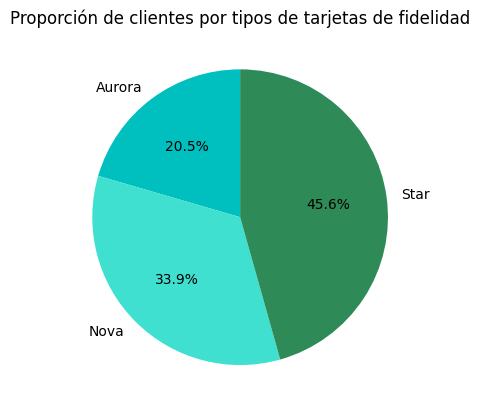

In [369]:
colores = ["c", "turquoise", "seagreen"]

plt.pie("loyalty_number",
         labels = "loyalty_card",
         data = df_fidelidad,
         autopct = "%1.1f%%",
         colors= colores,
         textprops = {"fontsize" : 10},
         startangle = 90)

plt.title("Proporción de clientes por tipos de tarjetas de fidelidad")
plt.show()

Según mi grafica, podemos ver que, de todos nuestros clientes, casi la mitad tienen la tarjeta de fidelidad Star, un 45,6% exactamente. En segundo posición viene la tarjeta Nova con un 33,9% y en ultimo esta la tarjeta Aurora con solamente un 20.5%.

#### 8. ¿Cómo se distribuyen los clientes según su estado civil y género?

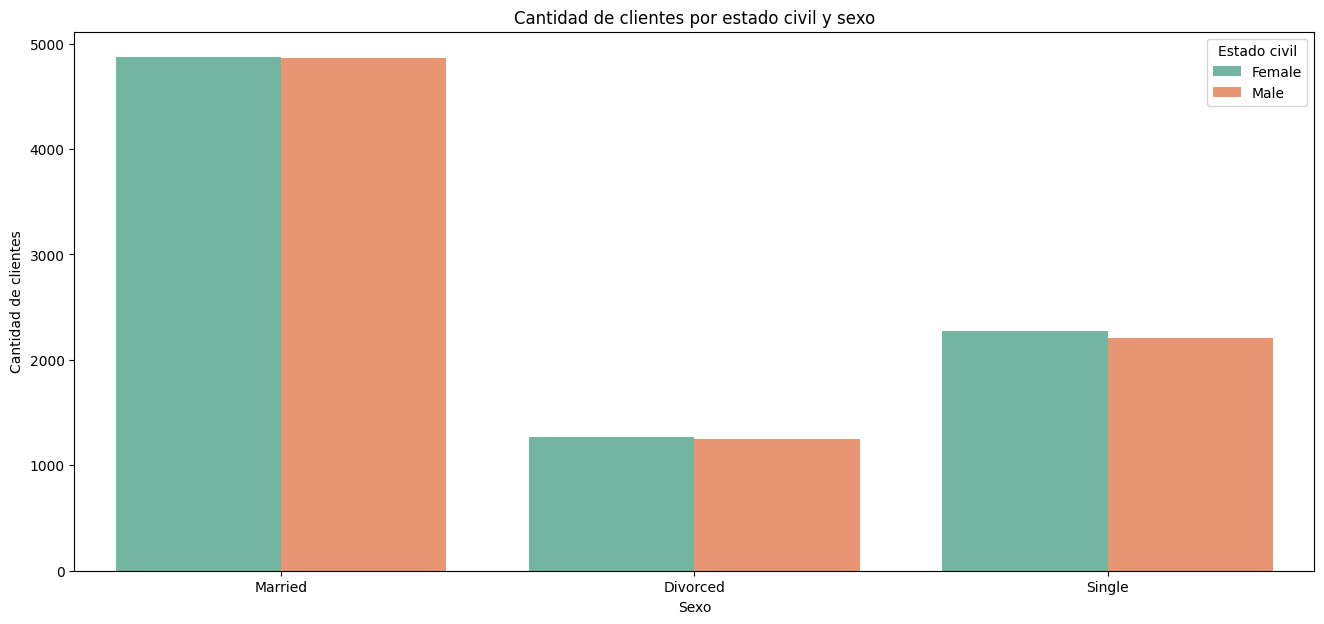

In [370]:
plt.figure(figsize=(16, 7))
sns.countplot(x='marital_status', hue='gender', data=df_unique_customers, palette="Set2")

plt.xlabel('Sexo')
plt.ylabel('Cantidad de clientes')
plt.title('Cantidad de clientes por estado civil y sexo')
plt.legend(title='Estado civil')
plt.show()

- Lo primero que podemos ver gracias a nuestra grafica de barras es que apenas hay diferencia entre nuestros dos generos ya que son muy igualados en las tres categorias. 
- Los que menos viajan son los divorciados, y los que mas viajan son los clientes casados (casi 5 veces mas que los divorciados). 
- Los clientes que no tiene pareja viajan un poco mas que los divorciados pero no llegan ni a la mitad de los casados.

### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

#### 9. Preparación de Datos.
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [383]:
df_filtrado = df_customer[["flights_booked","education"]]
df_filtrado.sample(5)

,flights_booked,education
311734,0,Bachelor
329030,9,Doctor
138314,0,Bachelor
33053,6,Bachelor
288382,11,College


#### 10. Análisis Descriptivo.
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [384]:
grupo_edu = df_filtrado.groupby("education")["flights_booked"].describe()
grupo_edu

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


In [386]:
df_filtrado.sample(5)

,flights_booked,education
62281,0,Bachelor
292093,0,College
320754,0,Bachelor
13483,0,College
127939,3,Bachelor


#### 11. Prueba Estadística.
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

- H0 : Mi hipotesis nula es que no hay gran diferencia sobre el numero de vuelo reservados entre los de "educación basica" y los de "educación superior"
- H1 : La hipotesis alternativa es que si hay una gran diferencia entre el numero de vuelo reservados por los de "educación basica" comparando con los de "educación superior".

Para mi A/B testing, empezare con :
- Shapiro-Wilk para comprobar la normalidad
- Levene para comprobar la homogeneidad

In [374]:
edu_basica = df_filtrado[df_filtrado['education'].isin(['High School or Below', 'College'])]
edu_sup = df_filtrado[df_filtrado['education'].isin(['Master', 'Doctor', 'Bachelor'])]


In [375]:
# #Creo mi funcion para tester la normalidad de los datos usando Shapiro-Wilk
def test_normalidad(data):
   
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        data: Serie de datos a analizar.
        nombre_grupo: Nombre del grupo al que pertenecen los datos.

    Returns:
        Indica si los datos siguen una distribución normal o no, el stat y el p_value
    """
     
    statistic, p_value = stats.shapiro(data)
    normalidad = "Normal" if p_value > 0.05 else "No normal"
  
    return normalidad,p_value

In [376]:
#Llamo a mi función 
results_edu_basica = test_normalidad(edu_basica["flights_booked"])

print(f"Resultados de normalidad para educación básica: {results_edu_basica}")

Resultados de normalidad para educación básica: ('No normal', 5.133253606115964e-138)


In [377]:
#llamo a mi función
results_edu_sup = test_normalidad(edu_sup["flights_booked"])
print(f"Resultados de normalidad para educación superior: {results_edu_sup}")

Resultados de normalidad para educación superior: ('No normal', 1.6181720133309896e-157)


Segun los resultados del test de Shapiro-Wilk, la distribución entre mis dos grupos, educación_basica y educación_sup no es normal.

In [378]:
#Creación de mi funcion de homogeneidad con levene

def homogeneidad (data1, data2):
    
    """
    Evalúa la homogeneidad de las varianzas entre grupos para una métrica específica

    Parámetros:
    data1: Serie de datos del primer grupo.
    data2: Serie de datos del segundo grupo.

    Returns:
    Devuelve los resultados del test
    """

    statistic, p_value = stats.levene(data1, data2)
    homogeneidad = "Homogéneas" if p_value > 0.05 else "No homogéneas"

    return homogeneidad, p_value

In [379]:
results_homogeneidad = homogeneidad(edu_basica["flights_booked"], edu_sup["flights_booked"])
print(f"Resultados de homogeneidad de varianzas: {results_homogeneidad}")

Resultados de homogeneidad de varianzas: ('No homogéneas', 0.0048587279888045185)


Segun los resultados del test de Levene, las varianzas de mis dos grupos no son homogeneas.

Ahora sabemos que nuestros datos no cumplen el test de normalidad ni el de homogeneidad, por lo cual vamos a hacer pruebas conn el Test de Mann-Whitney para evaluar si hay diferencias significativas entre mis dos grupos.

In [391]:
#Creación de una función para averiguar si hay diferencias entre mis dos grupos de estudio

def test_man_whitney(data1, data2):

    """
    Realiza la prueba de Mann-Whitney U para comparar las distribuciones de dos grupos.

    Parámetros:
    data1: Serie de datos del primer grupo.
    data2: Serie de datos del segundo grupo.

    Returns 
    Stat U y p_valor
    """
    statistic, p_value = stats.mannwhitneyu(data1, data2)
            
    return p_value

In [392]:
results_mwu = test_man_whitney(edu_basica["flights_booked"], edu_sup["flights_booked"])
print(f"Resultados del test de Mann-Whitney U: {results_mwu}")

Resultados del test de Mann-Whitney U: 0.002942081262120518


Con el resultado 0.0029 del test de Mann-Whitney, confirmo que existe una diferencia significativa en la cantidad de vuelos reservados entre mis dos grupos.

#### Conclusión de mi test A/B.

Despues de varios tests, puedo rechazar mi hipótesis nula y confirmar que existe una diferencia significativa entre la cantidad de vuelos reservados y el nivel educativo. Los que tienen educación superior (a partir del nivel master) suelen hacer mas reservas de vuelos que los de educación inferior.